In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Imbalanced Dataset

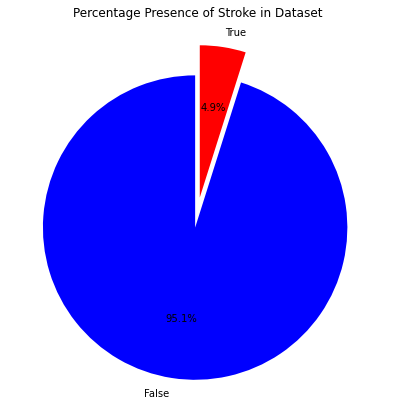

In [6]:
labels = ["False", "True"]
sizes = df['stroke'].value_counts(sort = True)

colors = ["blue","red"]
 
plt.figure(figsize=(7,7))
plt.pie(sizes, explode = (0.1, 0.1), labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,)

plt.title('Percentage Presence of Stroke in Dataset')
plt.show()

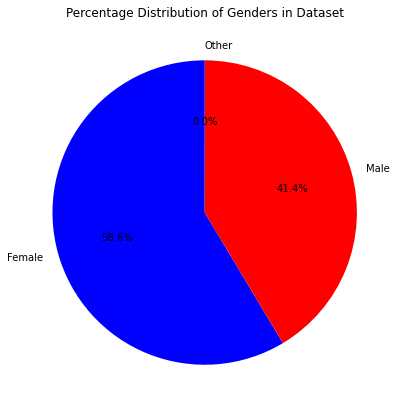

In [7]:
labels = df['gender'].value_counts(sort = True).index
sizes = df['gender'].value_counts(sort = True)

colors = ["blue","red"]
 
plt.figure(figsize=(7,7))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,)

plt.title('Percentage Distribution of Genders in Dataset')
plt.show()

## Smoking Status

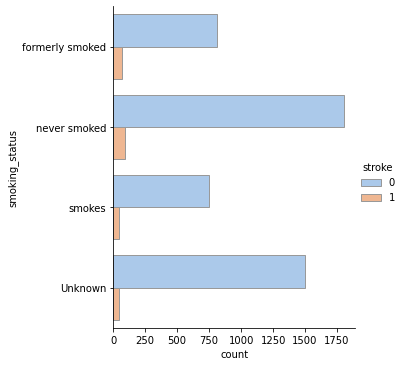

In [8]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

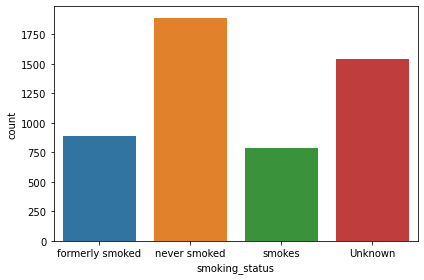

In [9]:
ax = sns.countplot(data=df, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

#### Convert all formerly smoked to smokes

In [10]:
smokeDF = df.copy()
smokeDF["smoking_status"].replace({"formerly smoked": "smokes"}, inplace=True)
smokeDF

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,smokes,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,smokes,0


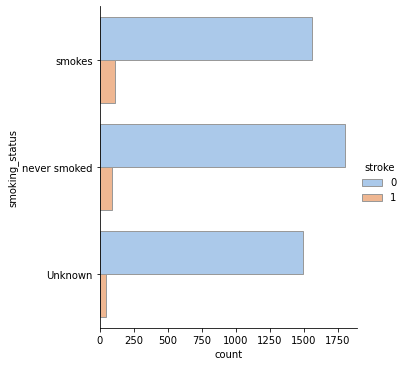

In [11]:
sns.catplot(y="smoking_status", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=smokeDF)

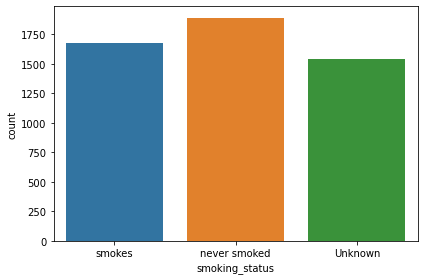

In [12]:
ax = sns.countplot(data=smokeDF, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

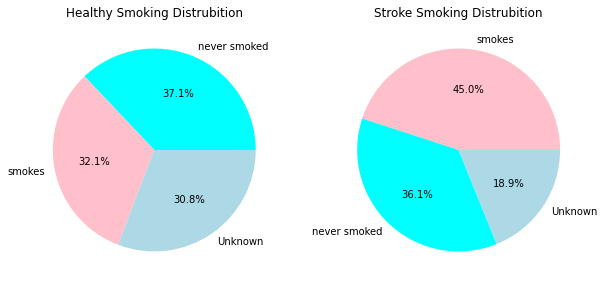

In [13]:
healthy = smokeDF[smokeDF['stroke'] == 0].smoking_status.value_counts(sort = True)
stroke = smokeDF[smokeDF['stroke'] == 1].smoking_status.value_counts(sort = True)

fig, axs = plt.subplots(ncols=2, figsize = (10, 5))
axs[0].pie(healthy, labels=healthy.index, autopct='%1.1f%%', colors = ['cyan', 'pink', 'lightblue'],)
axs[0].set_title("Healthy Smoking Distrubition")
axs[1].pie(stroke, labels=stroke.index, autopct='%1.1f%%', colors = ['pink', 'cyan', 'lightblue'],)
axs[1].set_title("Stroke Smoking Distrubition")
plt.show()

## Hypertension

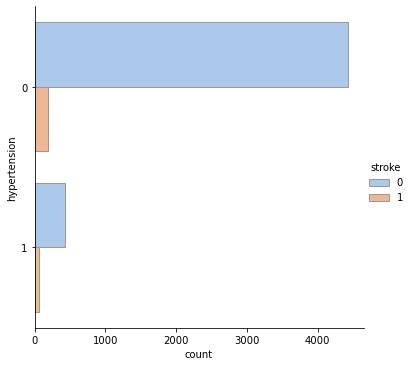

In [14]:
sns.catplot(y="hypertension", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

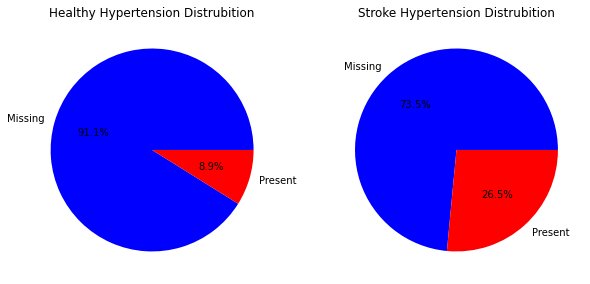

In [15]:
healthy = df[df['stroke'] == 0].hypertension.value_counts(sort = True)
stroke = df[df['stroke'] == 1].hypertension.value_counts(sort = True)

fig, axs = plt.subplots(ncols=2, figsize = (10, 5))
axs[0].pie(healthy, labels=['Missing', 'Present'], autopct='%1.1f%%', colors = ['blue', 'red'],)
axs[0].set_title("Healthy Hypertension Distrubition")
axs[1].pie(stroke, labels=['Missing', 'Present'], autopct='%1.1f%%', colors = ['blue', 'red'],)
axs[1].set_title("Stroke Hypertension Distrubition")
plt.show()

## Gender

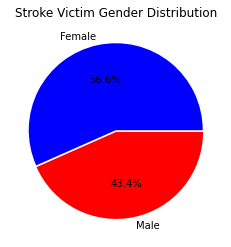

In [16]:
temp = df['gender'][df['stroke'] == 1]
gender_stroke = pd.DataFrame(data = temp)
stroked = df.query('stroke == 1')

distribution = gender_stroke['gender'].value_counts()

plt.pie(distribution, explode = (0.01, 0.01), labels = ['Female', 'Male'], autopct='%1.1f%%', colors = ['blue', 'red'], )
plt.title("Stroke Victim Gender Distribution")
plt.show()

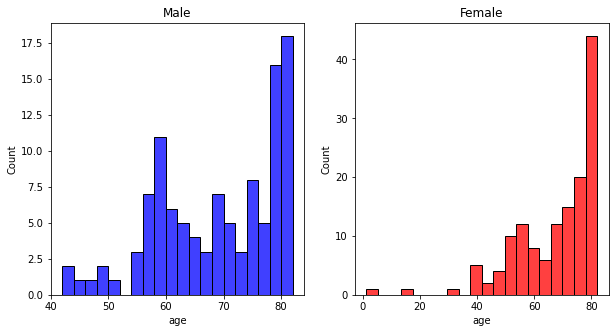

In [17]:
fig, axs = plt.subplots(ncols=2, figsize = (10, 5))
sns.histplot(stroked.query('gender=="Male"').age, ax=axs[0], color = 'b', bins = 20).set_title("Male")
sns.histplot(stroked.query('gender=="Female"').age, ax=axs[1], color = 'r', bins = 20).set_title("Female")
plt.show()

Text(0.5, 1.0, 'Male Stroke Distribution')

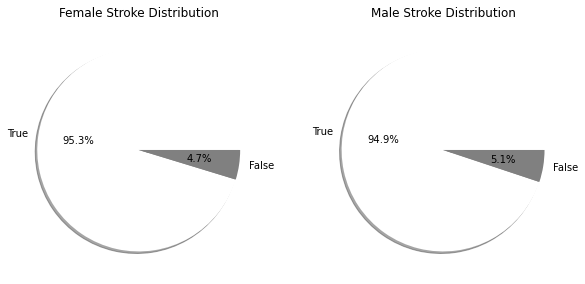

In [18]:
female = df.query('gender != "Male"')
male = df.query('gender != "Female"')

labels = ["True", "False"]
distributionF = female['stroke'].value_counts()
distributionM = male['stroke'].value_counts()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (10, 5))
ax1.pie(distributionF, colors = ['white', 'gray'], shadow = True, autopct = '%1.1f%%', labels = labels)
ax1.set_title("Female Stroke Distribution")
ax2.pie(distributionM, colors = ['white', 'gray'], shadow = True, autopct = '%1.1f%%', labels = labels)
ax2.set_title("Male Stroke Distribution")

## Heart Disease

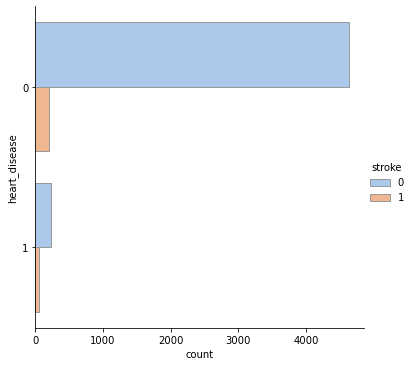

In [115]:
sns.catplot(y="heart_disease", hue="stroke", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

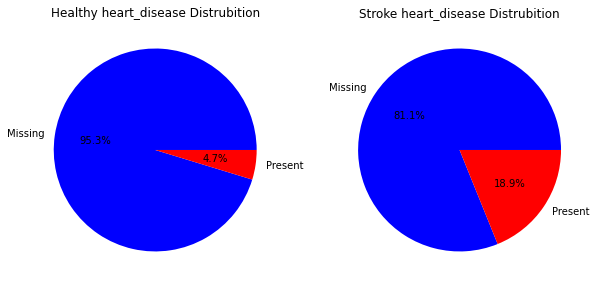

In [116]:
healthy = df[df['stroke'] == 0].heart_disease.value_counts(sort = True)
stroke = df[df['stroke'] == 1].heart_disease.value_counts(sort = True)

fig, axs = plt.subplots(ncols=2, figsize = (10, 5))
axs[0].pie(healthy, labels=['Missing', 'Present'], autopct='%1.1f%%', colors = ['blue', 'red'],)
axs[0].set_title("Healthy heart_disease Distrubition")
axs[1].pie(stroke, labels=['Missing', 'Present'], autopct='%1.1f%%', colors = ['blue', 'red'],)
axs[1].set_title("Stroke heart_disease Distrubition")
plt.show()

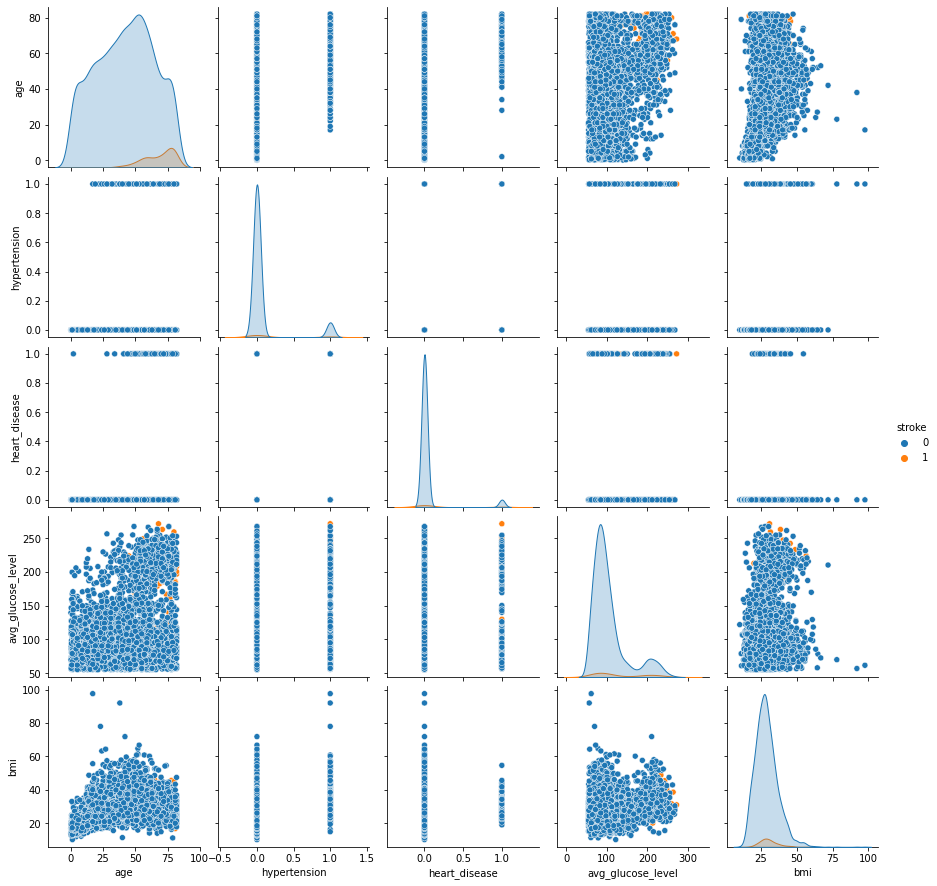

In [26]:
sns.pairplot(df, hue='stroke')

## Weka Results

In [108]:
weka_results = [
    ['ZeroR', 95.1272],
    ['OneR', 95.1076],
    ['Random Forest', 95.0881],
    ['J48', 95.1272],
    ['Random Tree', 91.2133],
    ['Multilayer Perceptron', 93.6399],
    ['Naive Bayes', 88.591]
]

weka_results_df = pd.DataFrame(weka_results,columns=['Model','Accuracy'])

weka_results_df.sort_values(by=['Accuracy'],inplace=True,ascending=False)
weka_results_df

,Model,Accuracy
0,ZeroR,95.1272
3,J48,95.1272
1,OneR,95.1076
2,Random Forest,95.0881
5,Multilayer Perceptron,93.6399
4,Random Tree,91.2133
6,Naive Bayes,88.5910


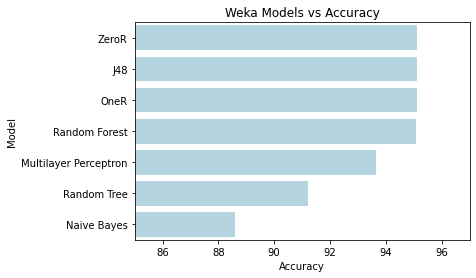

In [112]:
sns.barplot(x='Accuracy',y='Model',data=weka_results_df,color='lightblue').set(xlim=(85, 97))
plt.title('Weka Models vs Accuracy');

## Load Libraries for Machine Learning

In [45]:
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
# import scikitplot as skplt


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score

In [21]:
# df.dropna(inplace = True)
# df.to_csv('healthcare-dataset-stroke-data-dropna.csv')

In [30]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.pop('id')
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


## Replace Nulls

In [23]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

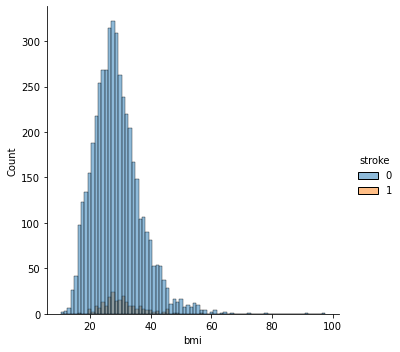

In [32]:
sns.displot(df, x='bmi', hue='stroke')

In [ ]:
# Replace Null with Mean
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(),inplace=True)

In [33]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [34]:
# A really fantsatic and intelligent way to deal with blanks, 
# from Thoman Konstantin in: https://www.kaggle.com/thomaskonstantin/analyzing-and-modeling-stroke-data

BMI_Tree_Regressor_Pipeline = Pipeline(steps=[
    ('scale',StandardScaler()),
    ('lr',RandomForestRegressor(random_state=101)),
])
X = df[['age','gender','smoking_status','hypertension', 'heart_disease', 'bmi']].copy() # bmi mainly affected by these, 
# but didn't want other health attributes
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
X.smoking_status = X.smoking_status.replace({'never smoked': 0,'Unknown': -1,'formerly smoked': 2,'smokes': 1}).astype(np.uint8)


Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
BMI_Tree_Regressor_Pipeline.fit(X,Y)
predicted_bmi = pd.Series(BMI_Tree_Regressor_Pipeline.predict(Missing[['age','gender','smoking_status',
                                                                       'hypertension', 'heart_disease', ]]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [35]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.573442,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


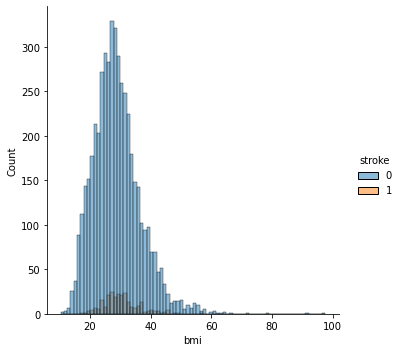

In [36]:
sns.displot(df, x='bmi', hue='stroke')

In [37]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [38]:
dfENC = df.copy()

In [39]:
le = LabelEncoder()
dfENC['gender'] = le.fit_transform(df['gender'])
dfENC['ever_married'] = le.fit_transform(df['ever_married'])
dfENC['work_type'] = le.fit_transform(df['work_type'])
dfENC['Residence_type'] = le.fit_transform(df['Residence_type'])
dfENC['smoking_status'] = le.fit_transform(df['smoking_status'])

In [40]:
dfENC.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.573442,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [57]:
# Other way to label encode our columns
dfENC.gender = dfENC.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)
dfENC.Residence_type= dfENC.Residence_type.replace({'Rural':0,'Urban':1}).astype(np.uint8)
dfENC.work_type = dfENC.work_type.replace({'Private':0,'Self-employed':1,
                                                 'Govt_job':2,'children':-1,'Never_worked':-2}).astype(np.uint8)
dfENC.smoking_status = dfENC.smoking_status.replace({'never smoked': 0,'Unknown': -1,
                                                     'formerly smoked': 2,'smokes': 1}).astype(np.uint8)
dfENC.ever_married = dfENC.ever_married.replace({'Yes': 1, 'No': 0}).astype(np.uint8)
dfENC.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,1,228.69,36.60,2,1
1,51676,1,61.0,0,0,1,1,0,202.21,29.05,0,1
2,31112,0,80.0,0,1,1,0,0,105.92,32.50,0,1
3,60182,1,49.0,0,0,1,0,1,171.23,34.40,1,1
4,1665,1,79.0,1,0,1,1,0,174.12,24.00,0,1


In [41]:
X  = dfENC[['gender','age','hypertension','heart_disease','ever_married','work_type',
            'Residence_type','avg_glucose_level','bmi','smoking_status']]
y = dfENC['stroke']
X.shape, y.shape

((5110, 10), (5110,))

In [46]:
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0,5,9])],remainder='passthrough')
X = np.array(ct.fit_transform(X))
X[0]

array([  0.  ,   1.  ,   0.  ,   0.  ,   0.  ,   1.  ,   0.  ,   0.  ,
         0.  ,   1.  ,   0.  ,   0.  ,  67.  ,   0.  ,   1.  ,   1.  ,
         1.  , 228.69,  36.6 ])

## Training and Test Set Creation

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4088, 19), (1022, 19), (4088,), (1022,))

In [48]:
print(sum(y_train==1)) # cases of stroke in y_train
sum(y_train==0) # not cases

195


3893

In [49]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train,y_train.ravel())
sum(y_train_res==1) # cases of stroke in y_train after smote

3893

In [117]:
X_train_res.shape, y_train_res.shape

((7786, 19), (7786,))

In [75]:
sm = SMOTE(random_state=0)
X_test_res, y_test_res = sm.fit_resample(X_test,y_test.ravel())
X_test.shape, y_test.shape, X_test_res.shape, y_test_res.shape

((1022, 19), (1022,), (1936, 19), (1936,))

## Model Implementation

In [62]:
models = []

models.append(['Logistic Regression',LogisticRegression(solver='liblinear', random_state=0)])
models.append(['BernoulliNB',BernoulliNB()])
models.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])
models.append(['RandomForest',RandomForestClassifier(random_state=0)])
models.append(['KNeighbors', KNeighborsClassifier()])



models.append(['SVM',SVC(C= 1, kernel= 'rbf', random_state= 0)])
models.append(['XGBoost', GradientBoostingClassifier(random_state=0)])
models.append(['AdaBoostClassifier',AdaBoostClassifier()])
models.append(['Cat Boost', CatBoostClassifier(logging_level='Silent')])
models.append(['XGBClassifier', XGBClassifier(learning_rate=0.1,objective='binary:logistic',
                                              random_state=0,eval_metric='mlogloss')])
models.append(['MLPClassifier', MLPClassifier(hidden_layer_sizes=(300,300,300), max_iter=200, 
                                              alpha=0.00001, solver='adam', verbose=10,  random_state=0)])

In [118]:
for i, j in models:
    print(i)

Logistic Regression
BernoulliNB
DecisionTree
RandomForest
KNeighbors
SVM
XGBoost
AdaBoostClassifier
Cat Boost
XGBClassifier
MLPClassifier


In [63]:
base_model_list= []

for m in range(len(models)):
    temp_list = []
    model = models[m][1]
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train_res, y = y_train_res, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    
    print(models[m][0],':')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('-----------------------------------')
    
    temp_list.append(models[m][0])
    temp_list.append((accuracy_score(y_test, y_pred))*100) 
    temp_list.append(accuracies.mean()*100)
    temp_list.append(roc)
    temp_list.append(precision)
    temp_list.append(recall)
    temp_list.append(f1)
    base_model_list.append(temp_list)

Logistic Regression :
[[751 217]
 [ 16  38]]
Accuracy Score:  0.7720156555772995
K-Fold Validation Mean Accuracy: 78.54 %
Standard Deviation: 1.31 %
ROC AUC Score: 0.74
Precision: 0.15
Recall: 0.70
F1: 0.25
-----------------------------------
BernoulliNB :
[[841 127]
 [ 30  24]]
Accuracy Score:  0.8463796477495108
K-Fold Validation Mean Accuracy: 86.77 %
Standard Deviation: 4.00 %
ROC AUC Score: 0.66
Precision: 0.16
Recall: 0.44
F1: 0.23
-----------------------------------
DecisionTree :
[[928  40]
 [ 49   5]]
Accuracy Score:  0.9129158512720157
K-Fold Validation Mean Accuracy: 94.50 %
Standard Deviation: 5.42 %
ROC AUC Score: 0.53
Precision: 0.11
Recall: 0.09
F1: 0.10
-----------------------------------
RandomForest :
[[964   4]
 [ 52   2]]
Accuracy Score:  0.9452054794520548
K-Fold Validation Mean Accuracy: 97.10 %
Standard Deviation: 6.87 %
ROC AUC Score: 0.52
Precision: 0.33
Recall: 0.04
F1: 0.07
-----------------------------------
KNeighbors :
[[795 173]
 [ 28  26]]
Accuracy Score

C:\Users\Alex\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Alex\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier :
[[963   5]
 [ 51   3]]
Accuracy Score:  0.9452054794520548
K-Fold Validation Mean Accuracy: 96.84 %
Standard Deviation: 7.17 %
ROC AUC Score: 0.53
Precision: 0.38
Recall: 0.06
F1: 0.10
-----------------------------------
Iteration 1, loss = 1.05434737
Iteration 2, loss = 0.48674920
Iteration 3, loss = 0.48905370
Iteration 4, loss = 0.46864327
Iteration 5, loss = 0.49326342
Iteration 6, loss = 0.47030203
Iteration 7, loss = 0.47141502
Iteration 8, loss = 0.45844349
Iteration 9, loss = 0.44785533
Iteration 10, loss = 0.44230319
Iteration 11, loss = 0.45443318
Iteration 12, loss = 0.44494467
Iteration 13, loss = 0.44537971
Iteration 14, loss = 0.42611258
Iteration 15, loss = 0.42552320
Iteration 16, loss = 0.43503844
Iteration 17, loss = 0.42565805
Iteration 18, loss = 0.41418887
Iteration 19, loss = 0.41200101
Iteration 20, loss = 0.41015388
Iteration 21, loss = 0.40515321
Iteration 22, loss = 0.41602932
Iteration 23, loss = 0.39693348
Iteration 24, loss = 0.38916406
Iter

Iteration 83, loss = 0.25253110
Iteration 84, loss = 0.25724166
Iteration 85, loss = 0.28588206
Iteration 86, loss = 0.28293493
Iteration 87, loss = 0.24990294
Iteration 88, loss = 0.26544558
Iteration 89, loss = 0.25840623
Iteration 90, loss = 0.23707927
Iteration 91, loss = 0.24716123
Iteration 92, loss = 0.23174173
Iteration 93, loss = 0.24295639
Iteration 94, loss = 0.24958845
Iteration 95, loss = 0.23676634
Iteration 96, loss = 0.21319993
Iteration 97, loss = 0.20072211
Iteration 98, loss = 0.26748982
Iteration 99, loss = 0.23356239
Iteration 100, loss = 0.21578532
Iteration 101, loss = 0.20776444
Iteration 102, loss = 0.20702375
Iteration 103, loss = 0.19980662
Iteration 104, loss = 0.21143113
Iteration 105, loss = 0.22472570
Iteration 106, loss = 0.20688619
Iteration 107, loss = 0.18723878
Iteration 108, loss = 0.18105371
Iteration 109, loss = 0.20466205
Iteration 110, loss = 0.22578985
Iteration 111, loss = 0.19307149
Iteration 112, loss = 0.22857129
Iteration 113, loss = 0.250

Iteration 41, loss = 0.41227264
Iteration 42, loss = 0.39857315
Iteration 43, loss = 0.38398783
Iteration 44, loss = 0.40545756
Iteration 45, loss = 0.38010208
Iteration 46, loss = 0.39199122
Iteration 47, loss = 0.36822083
Iteration 48, loss = 0.36621965
Iteration 49, loss = 0.36672718
Iteration 50, loss = 0.36381978
Iteration 51, loss = 0.36557844
Iteration 52, loss = 0.38865700
Iteration 53, loss = 0.36830867
Iteration 54, loss = 0.35932855
Iteration 55, loss = 0.36557828
Iteration 56, loss = 0.36790047
Iteration 57, loss = 0.35322477
Iteration 58, loss = 0.34549305
Iteration 59, loss = 0.35121759
Iteration 60, loss = 0.34781537
Iteration 61, loss = 0.34300577
Iteration 62, loss = 0.33655765
Iteration 63, loss = 0.32584945
Iteration 64, loss = 0.33747814
Iteration 65, loss = 0.33551607
Iteration 66, loss = 0.32327420
Iteration 67, loss = 0.32907214
Iteration 68, loss = 0.30726114
Iteration 69, loss = 0.34213380
Iteration 70, loss = 0.30917215
Iteration 71, loss = 0.31488487
Iteratio

Iteration 98, loss = 0.19755550
Iteration 99, loss = 0.19834624
Iteration 100, loss = 0.22663998
Iteration 101, loss = 0.20110882
Iteration 102, loss = 0.19410703
Iteration 103, loss = 0.18685606
Iteration 104, loss = 0.18773687
Iteration 105, loss = 0.17023982
Iteration 106, loss = 0.17181893
Iteration 107, loss = 0.17888518
Iteration 108, loss = 0.16702390
Iteration 109, loss = 0.19910896
Iteration 110, loss = 0.17219286
Iteration 111, loss = 0.23660751
Iteration 112, loss = 0.20128873
Iteration 113, loss = 0.17829994
Iteration 114, loss = 0.17593274
Iteration 115, loss = 0.17703659
Iteration 116, loss = 0.23030512
Iteration 117, loss = 0.16157554
Iteration 118, loss = 0.16358376
Iteration 119, loss = 0.16242310
Iteration 120, loss = 0.14627096
Iteration 121, loss = 0.15701864
Iteration 122, loss = 0.18959081
Iteration 123, loss = 0.13874502
Iteration 124, loss = 0.14873206
Iteration 125, loss = 0.15959985
Iteration 126, loss = 0.29261964
Iteration 127, loss = 0.17675702
Iteration 12

Iteration 34, loss = 0.40965465
Iteration 35, loss = 0.40844614
Iteration 36, loss = 0.40528244
Iteration 37, loss = 0.39066802
Iteration 38, loss = 0.43233439
Iteration 39, loss = 0.39194613
Iteration 40, loss = 0.38471517
Iteration 41, loss = 0.39218864
Iteration 42, loss = 0.38585791
Iteration 43, loss = 0.39622813
Iteration 44, loss = 0.42126976
Iteration 45, loss = 0.40039495
Iteration 46, loss = 0.38016158
Iteration 47, loss = 0.39845024
Iteration 48, loss = 0.37497821
Iteration 49, loss = 0.37667292
Iteration 50, loss = 0.38030416
Iteration 51, loss = 0.39865993
Iteration 52, loss = 0.37091372
Iteration 53, loss = 0.35275775
Iteration 54, loss = 0.35226796
Iteration 55, loss = 0.36423808
Iteration 56, loss = 0.39131604
Iteration 57, loss = 0.34643081
Iteration 58, loss = 0.34412245
Iteration 59, loss = 0.33813602
Iteration 60, loss = 0.36003610
Iteration 61, loss = 0.34437910
Iteration 62, loss = 0.33493374
Iteration 63, loss = 0.32562817
Iteration 64, loss = 0.34296384
Iteratio

Iteration 153, loss = 0.13948680
Iteration 154, loss = 0.10886788
Iteration 155, loss = 0.09965073
Iteration 156, loss = 0.09912039
Iteration 157, loss = 0.11946811
Iteration 158, loss = 0.09724405
Iteration 159, loss = 0.09519728
Iteration 160, loss = 0.14502224
Iteration 161, loss = 0.11974329
Iteration 162, loss = 0.10008408
Iteration 163, loss = 0.09361613
Iteration 164, loss = 0.10609031
Iteration 165, loss = 0.09145433
Iteration 166, loss = 0.08938234
Iteration 167, loss = 0.09196818
Iteration 168, loss = 0.10568908
Iteration 169, loss = 0.12687535
Iteration 170, loss = 0.08614658
Iteration 171, loss = 0.17323548
Iteration 172, loss = 0.12421027
Iteration 173, loss = 0.09285248
Iteration 174, loss = 0.10320613
Iteration 175, loss = 0.12506809
Iteration 176, loss = 0.10308753
Iteration 177, loss = 0.12255396
Iteration 178, loss = 0.15791335
Iteration 179, loss = 0.10222495
Iteration 180, loss = 0.08870477
Iteration 181, loss = 0.10502141
Training loss did not improve more than tol

C:\Users\Alex\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.17709354
Iteration 2, loss = 0.49630423
Iteration 3, loss = 0.49819479
Iteration 4, loss = 0.47368864
Iteration 5, loss = 0.48908022
Iteration 6, loss = 0.46574648
Iteration 7, loss = 0.46011778
Iteration 8, loss = 0.47210278
Iteration 9, loss = 0.46800181
Iteration 10, loss = 0.46354639
Iteration 11, loss = 0.46908978
Iteration 12, loss = 0.44540434
Iteration 13, loss = 0.44637668
Iteration 14, loss = 0.46072505
Iteration 15, loss = 0.44004060
Iteration 16, loss = 0.43909329
Iteration 17, loss = 0.43122726
Iteration 18, loss = 0.42820593
Iteration 19, loss = 0.45870213
Iteration 20, loss = 0.44014428
Iteration 21, loss = 0.42131536
Iteration 22, loss = 0.43569346
Iteration 23, loss = 0.44976791
Iteration 24, loss = 0.41985020
Iteration 25, loss = 0.41846765
Iteration 26, loss = 0.40833197
Iteration 27, loss = 0.42637778
Iteration 28, loss = 0.40190276
Iteration 29, loss = 0.40689181
Iteration 30, loss = 0.40361308
Iteration 31, loss = 0.40162807
Iteration 32, los

C:\Users\Alex\anaconda3\envs\tf\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Iteration 1, loss = 1.19471931
Iteration 2, loss = 0.50314665
Iteration 3, loss = 0.49996333
Iteration 4, loss = 0.48001521
Iteration 5, loss = 0.48712196
Iteration 6, loss = 0.47015405
Iteration 7, loss = 0.46469231
Iteration 8, loss = 0.48621398
Iteration 9, loss = 0.46744711
Iteration 10, loss = 0.48105919
Iteration 11, loss = 0.45502280
Iteration 12, loss = 0.45639730
Iteration 13, loss = 0.45088217
Iteration 14, loss = 0.46515958
Iteration 15, loss = 0.45080435
Iteration 16, loss = 0.44177848
Iteration 17, loss = 0.43448856
Iteration 18, loss = 0.43544896
Iteration 19, loss = 0.44093481
Iteration 20, loss = 0.42751113
Iteration 21, loss = 0.43562953
Iteration 22, loss = 0.43811443
Iteration 23, loss = 0.44863835
Iteration 24, loss = 0.42386693
Iteration 25, loss = 0.42772856
Iteration 26, loss = 0.41032295
Iteration 27, loss = 0.43877922
Iteration 28, loss = 0.41246930
Iteration 29, loss = 0.41566024
Iteration 30, loss = 0.41548560
Iteration 31, loss = 0.40513874
Iteration 32, los

In [64]:
base_model_df = pd.DataFrame(base_model_list,columns=['Model','Accuracy','K-Fold Mean Accuracy','ROC_AUC','Precision','Recall','F1 Score'])

base_model_df.sort_values(by=['Accuracy','K-Fold Mean Accuracy'],inplace=True,ascending=False)
base_model_df

,Model,Accuracy,K-Fold Mean Accuracy,Std.Deviation,ROC_AUC,Precision,Recall,F1 Score
6,XGBoost,94.716243,96.687583,7.289349,0.517485,0.500000,0.037037,0.068966
3,RandomForest,94.520548,97.098531,6.869592,0.516452,0.333333,0.037037,0.066667
8,Cat Boost,94.520548,96.854546,7.168889,0.525195,0.375000,0.055556,0.096774
9,XGBClassifier,94.520548,96.841726,7.171412,0.525195,0.375000,0.055556,0.096774
7,AdaBoostClassifier,93.542074,95.904115,7.074843,0.511287,0.125000,0.037037,0.057143
2,DecisionTree,91.291585,94.503945,5.417977,0.525635,0.111111,0.092593,0.101010
10,MLPClassifier,90.998043,93.001046,3.450708,0.576542,0.183333,0.203704,0.192982
1,BernoulliNB,84.637965,86.771931,3.998354,0.656623,0.158940,0.444444,0.234146
4,KNeighbors,80.332681,89.031254,1.208642,0.651381,0.130653,0.481481,0.205534
0,Logistic Regression,77.201566,78.538285,1.311287,0.739765,0.149020,0.703704,0.245955


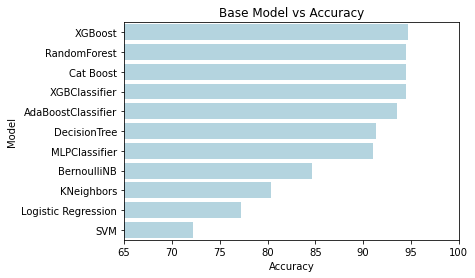

In [121]:
sns.barplot(x='Accuracy',y='Model',data=df2,color='lightblue').set(xlim=(65, 100))
plt.title('Base Model vs Accuracy');

## Hyperparameter Tuning

In [78]:
grid_models = [(XGBClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error'], 'scale_pos_weight': [2, 3, 4]}]),
               (GradientBoostingClassifier(), [{'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [2,3,4,5,6,10]}]),
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}]),
               (AdaBoostClassifierssifier(), [{"learning_rate": [0.01, 0.5, 0.1], 'n_estimators':[100,150,200]}]),
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]),
               # (CatBoostClassifier(), [{"learning_rate": [0.01, 0.5, 0.1], 'n_estimators':[100,150,200]}]),
               # tuning catboostclassifier takes way too long!!! not to mention its cv testing!!! times x2!
              ]

In [79]:
from sklearn.model_selection import GridSearchCV

## Scoring Metric: Accuracy

In [90]:
accuracy_list = []
for i,j in grid_models:
    temp_list = []
    grid = GridSearchCV(estimator=i, param_grid = j, scoring = 'accuracy', cv = 10)
    grid.fit(X_train_res,y_train_res)
    
    y_pred_res = grid.predict(X_test_res)
    cm_res = confusion_matrix(y_test_res,y_pred_res)
    
    y_pred = grid.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    
    print('{}: Best Accuracy: {:.2f} %'.format(i, best_accuracy*100))
    
    print('Best Param: ' + str(best_param))
    print('Resample Results:')
    print(cm_res)
    print(accuracy_score(y_test_res,y_pred_res))
    
    print('Norm Results')
    print(cm)
    print(accuracy_score(y_test,y_pred))
    
    print('-'*25)
    print('')
    
    temp_list.append(str(i))
    temp_list.append(i)
    temp_list.append(best_param)
    temp_list.append(best_accuracy*100) 
    temp_list.append(accuracy_score(y_test_res,y_pred_res)*100)
    temp_list.append(roc_auc_score(y_test_res,y_pred_res)) #ROC AUC Score
    temp_list.append(precision_score(y_test_res,y_pred_res))  #Precision Score
    temp_list.append(recall_score(y_test_res,y_pred_res))  #Recall Score
    temp_list.append(f1_score(y_test_res,y_pred_res))  #F1 Score

    temp_list.append(accuracy_score(y_test,y_pred)*100)
    temp_list.append(roc_auc_score(y_test, y_pred)) #ROC AUC Score
    temp_list.append(precision_score(y_test, y_pred))  #Precision Score
    temp_list.append(recall_score(y_test, y_pred))  #Recall Score
    temp_list.append(f1_score(y_test, y_pred))  #F1 Score
    accuracy_list.append(temp_list)

C:\Users\Alex\anaconda3\envs\tf\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None,
              enable_categorical=False, gamma=None, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None,
              reg_lambda=None, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=None, verbosity=None): Best Accuracy: 96.38 %
Best Param: {'eval_metric': 'error', 'learning_rate': 0.1, 'scale_pos_weight': 2}
Resample Results:
[[950  18]
 [101 867]]
0.9385330578512396
Norm Results
[[950  18]
 [ 50   4]]
0.9334637964774951
-------------------------

GradientBoostingClassifier(): Best Accuracy: 96.87 %
Best Param: {

In [91]:
accuracy_df = pd.DataFrame(accuracy_list, columns=['str(Model)', 'Model','Best Param', 'Best Accuracy Score','SMOTE Accuracy',
                                                   'SMOTE ROC_AUC','SMOTE Precision','SMOTE Recall','SMOTE F1 Score',
                                                   'Accuracy', 'ROC_AUC','Precision','Recall','F1 Score'])
accuracy_df.sort_values(by=['Best Accuracy Score'],inplace=True,ascending=False)
accuracy_df

,str(Model),Model,Best Param,Best Accuracy Score,SMOTE Accuracy,SMOTE ROC_AUC,SMOTE Precision,SMOTE Recall,SMOTE F1 Score,Accuracy,ROC_AUC,Precision,Recall,F1 Score
2,RandomForestClassifier(),RandomForestClassifier(),"{'criterion': 'entropy', 'n_estimators': 200, ...",97.175569,93.543388,0.935434,0.994138,0.876033,0.931356,94.324853,0.506677,0.166667,0.018519,0.033333
1,GradientBoostingClassifier(),GradientBoostingClassifier(),"{'learning_rate': 0.1, 'max_depth': 10}",96.867350,93.233471,0.932335,0.990621,0.872934,0.928062,94.031311,0.505127,0.111111,0.018519,0.031746
3,AdaBoostClassifier(),AdaBoostClassifier(),"{'learning_rate': 0.5, 'n_estimators': 200}",96.597708,94.214876,0.942149,0.989703,0.893595,0.939197,93.933464,0.504610,0.100000,0.018519,0.031250
0,"XGBClassifier(base_score=None, booster=None, c...","XGBClassifier(base_score=None, booster=None, c...","{'eval_metric': 'error', 'learning_rate': 0.1,...",96.379298,93.853306,0.938533,0.979661,0.895661,0.935780,93.346380,0.527740,0.181818,0.074074,0.105263
4,DecisionTreeClassifier(),DecisionTreeClassifier(),"{'criterion': 'entropy', 'random_state': 0}",94.850378,86.880165,0.868802,0.938575,0.789256,0.857464,90.313112,0.520470,0.090909,0.092593,0.091743


In [ ]:
# did some research into adaboost, rfc, gdbt, no other parameters to change to help 
# increase minority class recall in norm y_test and DT sucks lol

In [97]:
accuracy_df.loc[0, 'str(Model)'] = 'XGBClassifier()'

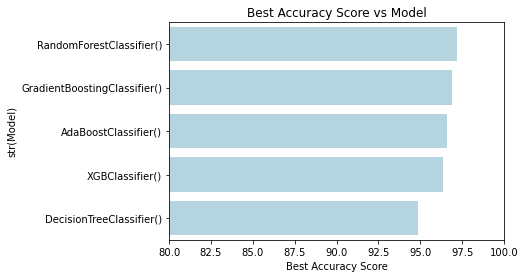

In [98]:
sns.barplot(x='Best Accuracy Score',y='str(Model)',data=accuracy_df,color='lightblue').set(xlim=(80, 100))
plt.title('Best Accuracy Score vs Model');

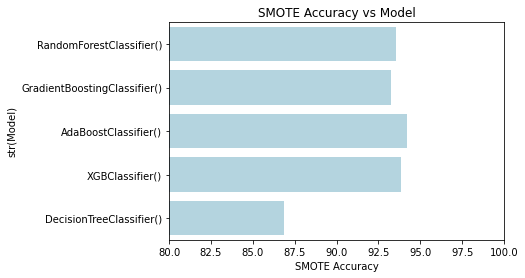

In [99]:
sns.barplot(x='SMOTE Accuracy',y='str(Model)',data=accuracy_df,color='lightblue').set(xlim=(80, 100))
plt.title('SMOTE Accuracy vs Model');

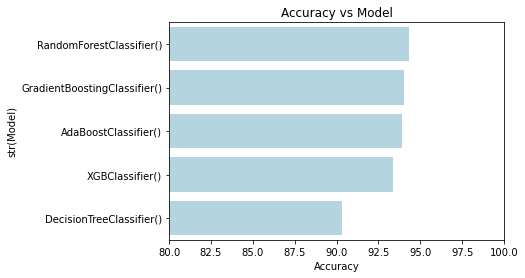

In [122]:
sns.barplot(x='Accuracy',y='str(Model)',data=accuracy_df,color='lightblue').set(xlim=(80, 100))
plt.title('Accuracy vs Model');

## XGB scale_pos_weight Hypertuning 

In [ ]:
# only option is xgb classifier tuning for norm y_train accuracy and increasing false positives

In [103]:
m1 = XGBClassifier(eval_metric='error', learning_rate=0.01, scale_pos_weight=3)
m1.fit(X_train_res, y_train_res)

y_pred_m1_res = m1.predict(X_test_res)
cm_m1_res = confusion_matrix(y_test_res, y_pred_m1_res)

y_pred_m1= m1.predict(X_test)
cm_m1 = confusion_matrix(y_test, y_pred_m1)

print(cm_m1_res)
print(cm_m1)

[[811 157]
 [107 861]]
[[811 157]
 [ 28  26]]


In [104]:
m2 = XGBClassifier(eval_metric='error', learning_rate=0.01, scale_pos_weight=4)
m2.fit(X_train_res, y_train_res)

y_pred_m2_res = m2.predict(X_test_res)
cm_m2_res = confusion_matrix(y_test_res, y_pred_m2_res)

y_pred_m2= m2.predict(X_test)
cm_m2 = confusion_matrix(y_test, y_pred_m2)

print(cm_m2_res)
print(cm_m2)

[[748 220]
 [103 865]]
[[748 220]
 [ 25  29]]


In [105]:
m3 = XGBClassifier(eval_metric='error', learning_rate=0.01, scale_pos_weight=5)
m3.fit(X_train_res, y_train_res)

y_pred_m3_res = m3.predict(X_test_res)
cm_m3_res = confusion_matrix(y_test_res, y_pred_m3_res)

y_pred_m3= m3.predict(X_test)
cm_m3 = confusion_matrix(y_test, y_pred_m3)

print(cm_m3_res)
print(cm_m3)

[[697 271]
 [ 96 872]]
[[697 271]
 [ 21  33]]


In [106]:
m4 = XGBClassifier(eval_metric='error', learning_rate=0.01, scale_pos_weight=6)
m4.fit(X_train_res, y_train_res)

y_pred_m4_res = m4.predict(X_test_res)
cm_m4_res = confusion_matrix(y_test_res, y_pred_m4_res)

y_pred_m4= m4.predict(X_test)
cm_m4 = confusion_matrix(y_test, y_pred_m4)

print(cm_m4_res)
print(cm_m4)

[[678 290]
 [ 95 873]]
[[678 290]
 [ 21  33]]


In [107]:
m5 = XGBClassifier(eval_metric='error', learning_rate=0.01, scale_pos_weight=7)
m5.fit(X_train_res, y_train_res)

y_pred_m5_res = m5.predict(X_test_res)
cm_m5_res = confusion_matrix(y_test_res, y_pred_m5_res)

y_pred_m5= m5.predict(X_test)
cm_m5 = confusion_matrix(y_test, y_pred_m5)

print(cm_m4_res)
print(cm_m4)

[[678 290]
 [ 95 873]]
[[678 290]
 [ 21  33]]
